In [1]:
using Plots
using EmpiricalBayes
using Distributions
using LaTeXStrings

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
┌ Info: Recompiling stale cache file /Users/ignatiad/.julia/compiled/v0.7/EmpiricalBayes/hd5Pc.ji for EmpiricalBayes [a19f57e5-db63-5b49-a8b8-e6824725db53]
└ @ Base loading.jl:1185


In [62]:
pgfplots()

Plots.PGFPlotsBackend()

In [61]:
gr()

Plots.GRBackend()

In [ ]:
plotly()

In [60]:
using Plotly

┌ Info: Precompiling Plotly [58dd65bb-95f3-509e-9936-c39a10fdeae7]
└ @ Base loading.jl:1187


HTML{String}("    <script id=\"webio-setup-17875875603267975782\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-13952232379677572282\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-17875875603267975782\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (window.require && require.defined) {\n            // Jupyter notebook.\n            if (require.defined(\"nbextensions/webio/main\")\n                    || require.defined(\"/assetserver/39fc3ee1d5fe03c5ed81717f734407068529117f-dist/main.js\")) {\n                // Extension already loaded.\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/39fc3ee1d5fe03c5ed81717f734407068529117f-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-13952232379677572282\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

┌ Warning: `using A: B` will only be allowed for single bindings, not modules. Use `using A.B` instead
│   caller = ip:0x0
└ @ Core :-1


In [4]:
marginal_grid = collect(range(-6,stop=6,length=1001));
prior_grid = collect(range(-3,stop=3,length=101));
ds = MixingNormalConvolutionProblem(Normal, 0.2, prior_grid, marginal_grid);

In [5]:
true_dist = MixtureModel([ Normal(-2,.2), Normal(+2,.2)])
d_center = NormalConvolutionProblem(true_dist, marginal_grid);
f_center = BinnedMarginalDensity(d_center)

BinnedMarginalDensity([1.0712e-6, 1.12173e-6, 1.17447e-6, 1.22952e-6, 1.28697e-6, 1.34692e-6, 1.40947e-6, 1.47472e-6, 1.54277e-6, 1.61374e-6  …  1.61374e-6, 1.54277e-6, 1.47472e-6, 1.40947e-6, 1.34692e-6, 1.28697e-6, 1.22952e-6, 1.17447e-6, 1.12173e-6, 1.0712e-6], [-6.0, -5.988, -5.976, -5.964, -5.952, -5.94, -5.928, -5.916, -5.904, -5.892  …  5.892, 5.904, 5.916, 5.928, 5.94, 5.952, 5.964, 5.976, 5.988, 6.0], 0.011999999999999567)

┌ Warning: `replace(s::AbstractString, pat, f)` is deprecated, use `replace(s, pat => f)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:574 [inlined]
└ @ Core ./broadcast.jl:574
┌ Warning: broadcast will default to iterating over its arguments in the future. Wrap arguments of
│ type `x::PGFPlots.Axis` with `Ref(x)` to ensure they broadcast as "scalar" elements.
│   caller = ip:0x0
└ @ Core :-1


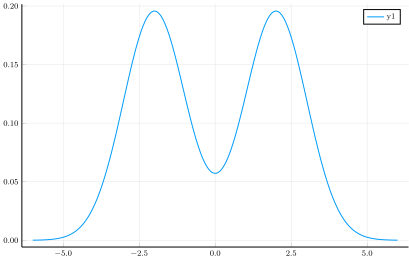

In [6]:
plot(marginal_grid, pdf.(Ref(d_center), marginal_grid))

In [6]:
#marginal_h = ds.marginal_h

#M_bd = marginal_h/sqrt(2*pi)

#f_const = BinnedMarginalDensity(M_bd, marginal_grid, marginal_h);
    # Train
#m= 100

100

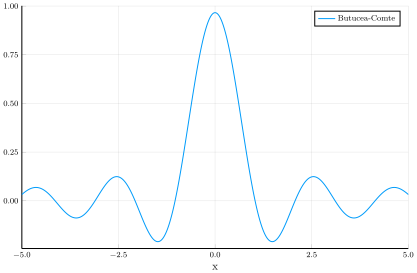

In [17]:
m = 10_000
cb = ComteButucea(MarginalDensityTarget(0.0), m, marginal_grid)
plot(cb,   xlim=(-5,5))

In [25]:
ma = MinimaxCalibrator(ds, f_center, m, MarginalDensityTarget(0.0); C=Inf,
    ε=0.0, max_smoother=false);

Academic license - for non-commercial use only


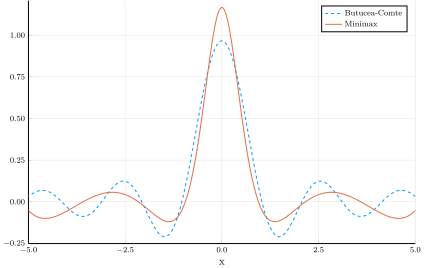

In [28]:
plot(cb, xlim=(-5,5), line=:dash)
plot!(ma, xlim=(-5,5))

In [81]:
g1_max = pdf(ds, ma.π1, marginal_grid);
g2_max = pdf(ds, ma.π2, marginal_grid);

In [28]:
h = marginal_grid[2]-marginal_grid[1]
(ma.f1[501] - ma.f2[501])/h

0.04862925146906616

In [32]:
ma.max_bias, ma.sd

(0.0013676986638973285, 0.005602261485581625)

In [21]:
c_band = 0.02

0.02

In [30]:
ma_density_band =  MinimaxCalibrator(ds, f_center, m, MarginalDensityTarget(0.0); C=c_band,
     ε=0.0, max_smoother=false);

Academic license - for non-commercial use only


In [51]:
ma_density_band.max_bias, ma_density_band.sd

(0.0029905825901657534, 0.005723287242320742)

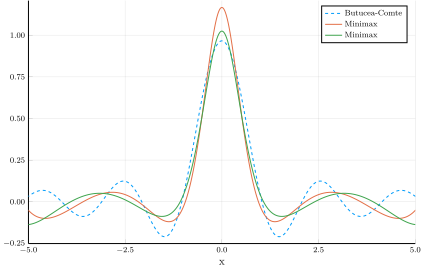

In [31]:
plot(cb, xlim=(-5,5), line=:dash)
plot!(ma, xlim=(-5,5))
plot!(ma_density_band, xlim=(-5,5))

In [86]:
g1_density = pdf(ds, ma_density_band.π1, marginal_grid);
g2_density = pdf(ds, ma_density_band.π2, marginal_grid);


In [32]:
upscale = 0.8#8 #8x upscaling in resolution
default(size=(1000*upscale,600*upscale)) #Plot canvas size

In [33]:
left_band =  max.(pdf.(d_center, marginal_grid) .- c_band, 0)
right_band =  min.(pdf.(d_center, marginal_grid) .+ c_band, 1.0)
h=marginal_grid[2]-marginal_grid[1]

0.011999999999999567

In [44]:
mycols=["#424395" "#018AC4" "#5EC2DA" "#EBC915" "#EB549A" "#550133"]

1×6 Array{String,2}:
 "#424395"  "#018AC4"  "#5EC2DA"  "#EBC915"  "#EB549A"  "#550133"

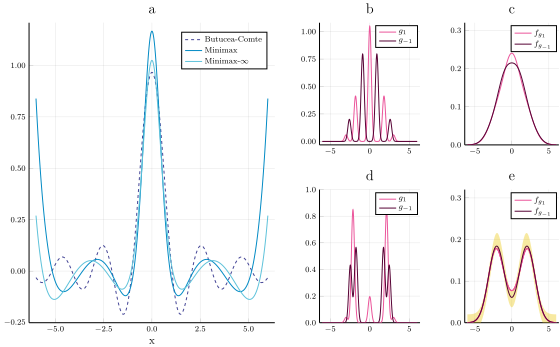

In [100]:
#col1="purple"
#col2="orange"

g1_density_band = pdf(ds, ma.π1, marginal_grid);
g2_density_band = pdf(ds, ma.π2, marginal_grid);
g1_density_no_band = pdf(ds, ma_density_band.π1, marginal_grid);
g2_density_no_band = pdf(ds, ma_density_band.π2, marginal_grid);

p0 = plot(marginal_grid, [cb.Q.Q ma.Q.Q .+ ma.Q.Qo ma_density_band.Q.Q .+ ma_density_band.Q.Qo],
            xlabel="x", color=[mycols[1] mycols[2] mycols[3] ],legend=:topright,
            line=([:dash :solid :solid]), 
             label=["Butucea-Comte" "Minimax" L"Minimax-$\infty$"])

p1 = plot(marginal_grid, [g1_density_band g2_density_band], label=[L"g_1" L"g_{-1}"], 
      color=[mycols[5] mycols[6]],
      xticks=([-5.0; 0.0; 5.0]))
p2 = plot(marginal_grid, [g1_density_no_band g2_density_no_band],  
     label=[L"g_1" L"g_{-1}"], ylim=(0, 1.0),
     color=[mycols[5] mycols[6]],
     xticks=([-5.0; 0.0; 5.0]))

p4 = plot(marginal_grid, [ma_density_band.f1./h ma_density_band.f1./h],
          fillrange=[left_band right_band], fillalpha=0.4, fillcolor=mycols[4],
          label="", 
          color=[mycols[5] mycols[5]],
          line=([:solid :solid]),
          xticks=([-5.0; 0.0; 5.0]))
plot!(p4, marginal_grid, [ma_density_band.f1./h ma_density_band.f2./h],
              color=[mycols[5] mycols[6]],
              label=[L"f_{g_1}" L"f_{g_{-1}}"], ylim=(0, 0.32))
p3 = plot(marginal_grid, [ma.f1 ma.f2]./h, 
    label=[L"f_{g_1}" L"f_{g_{-1}}"], ylim=(0, 0.32),
    xticks=([-5.0; 0.0; 5.0]),  color=[mycols[5] mycols[6]])

l = @layout [  a{0.5w} grid(2,2)]

plot(p0, p1, p3, p2, p4, layout=l, title = [('a':'z')[i] for j = 1:1, i=1:11])

In [103]:
m = 500
ma_prob =  MinimaxCalibrator(ds, f_center, m, OneSidedPriorTailProbability(0.0);
                  C=Inf,ε=0.0, max_smoother=false);
ma_prob_center =  MinimaxCalibrator(ds, f_center, m, OneSidedPriorTailProbability(0.0);
                  C=c_band,ε=0.0, max_smoother=false);

Academic license - for non-commercial use only
Academic license - for non-commercial use only


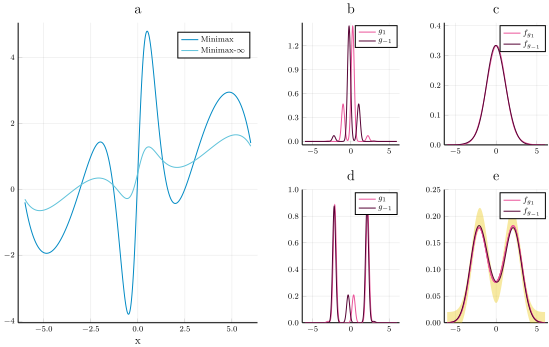

In [107]:
#col1="purple"
#col2="orange"

g1_density_band = pdf(ds, ma_prob.π1, marginal_grid);
g2_density_band = pdf(ds, ma_prob.π2, marginal_grid);
g1_density_no_band = pdf(ds, ma_prob_center.π1, marginal_grid);
g2_density_no_band = pdf(ds, ma_prob_center.π2, marginal_grid);

p0 = plot(marginal_grid,  [ma_prob.Q.Q .+ ma_prob.Q.Qo ma_prob_center.Q.Q .+ ma_prob_center.Q.Qo],
            xlabel="x", color=[ mycols[2] mycols[3] ],legend=:topright,
            line=([:solid :solid]), 
             label=["Minimax" L"Minimax-$\infty$"])

p1 = plot(marginal_grid, [g1_density_band g2_density_band], label=[L"g_1" L"g_{-1}"], 
      color=[mycols[5] mycols[6]],
      xticks=([-5.0; 0.0; 5.0]))
p2 = plot(marginal_grid, [g1_density_no_band g2_density_no_band],  
     label=[L"g_1" L"g_{-1}"], ylim=(0, 1.0),
     color=[mycols[5] mycols[6]],
     xticks=([-5.0; 0.0; 5.0]))

p4 = plot(marginal_grid, [ma_prob_center.f1./h ma_prob_center.f1./h],
          fillrange=[left_band right_band], fillalpha=0.4, fillcolor=mycols[4],
          label="", 
          color=[mycols[5] mycols[5]],
          line=([:solid :solid]),
          xticks=([-5.0; 0.0; 5.0]))
plot!(p4, marginal_grid, [ma_prob_center.f1./h ma_prob_center.f2./h],
              color=[mycols[5] mycols[6]],
              label=[L"f_{g_1}" L"f_{g_{-1}}"], ylim=(0, 0.25))
p3 = plot(marginal_grid, [ma_prob.f1 ma_prob.f2]./h, 
    label=[L"f_{g_1}" L"f_{g_{-1}}"], ylim=(0, 0.41),
    xticks=([-5.0; 0.0; 5.0]),  color=[mycols[5] mycols[6]])

l = @layout [  a{0.5w} grid(2,2)]

plot(p0, p1, p3, p2, p4, layout=l, title = [('a':'z')[i] for j = 1:1, i=1:11])

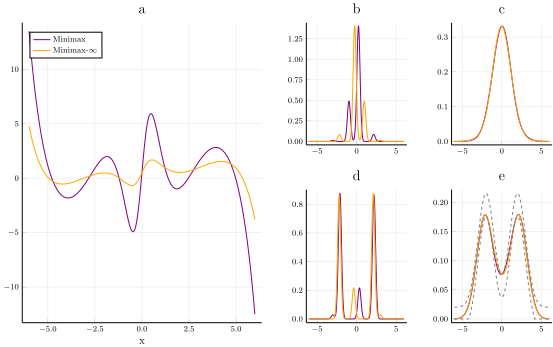

In [43]:
col1="purple"
col2="orange"

g1_density_band = pdf(ds, ma_prob.π1, marginal_grid);
g2_density_band = pdf(ds, ma_prob.π2, marginal_grid);
g1_density_no_band = pdf(ds, ma_prob_center.π1, marginal_grid);
g2_density_no_band = pdf(ds, ma_prob_center.π2, marginal_grid);

p0 = plot(marginal_grid, [ma_prob.Q.Q .+ ma_prob.Q.Qo ma_prob_center.Q.Q .+ ma_prob_center.Q.Qo],
            xlabel="x", color=["purple" "orange"],legend=:topleft,
            line=([:solid :solid]), 
             label=["Minimax" L"Minimax-$\infty$"])

p1 = plot(marginal_grid, [g1_density_band g2_density_band], label="", 
      color=[col1 col2],
      xticks=([-5.0; 0.0; 5.0]))
p2 = plot(marginal_grid, [g1_density_no_band g2_density_no_band], label="", 
     color=[col1 col2],
     xticks=([-5.0; 0.0; 5.0]))

p4 = plot(marginal_grid, [ma_prob_center.f1./h ma_prob_center.f2./h left_band right_band],
          label="", 
          color=[col1 col2 "grey" "grey"],
          line=([:solid :solid :dash :dash]),
          xticks=([-5.0; 0.0; 5.0]))

p3 = plot(marginal_grid, [ma_prob.f1 ma_prob.f2]/(marginal_grid[2]-marginal_grid[1]), 
    label="", xticks=([-5.0; 0.0; 5.0]),  color=[col1 col2])

l = @layout [  a{0.5w} grid(2,2)]

plot(p0, p1, p3, p2, p4, layout=l, title = [('a':'z')[i] for j = 1:1, i=1:11])

In [12]:
cb_mean = ComteButucea(PosteriorMeanNumerator(2.0), m, marginal_grid)
ma_mean =  MinimaxCalibrator(ds, f_const, m, PosteriorMeanNumerator(2.0); C=Inf);

Academic license - for non-commercial use only


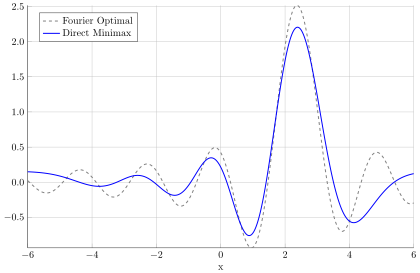

In [20]:
plot(marginal_grid, [cb_mean.Q.Q ma_mean.Q.Q .+ ma_mean.Q.Qo], xlabel="x", color=["grey" "blue"],
            line=([:dash :solid]), label=["Fourier Optimal" "Direct Minimax"], legend=:topleft)

In [21]:
savefig("posterior_mean_minimax_kernel.pdf")

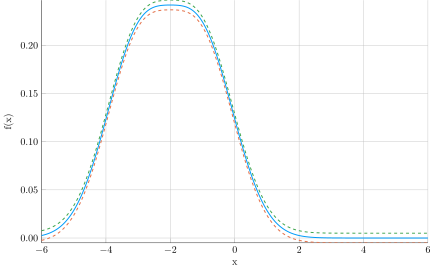

In [22]:
d_center_y = pdf.(d_center, marginal_grid)
c_band = 0.005
plot(marginal_grid, [d_center_y d_center_y.-c_band  d_center_y.+c_band],  xlabel="x",
    ylabel="f(x)", line=([:solid :dash :dash]), legend=false)

In [23]:
savefig("density_bands.pdf")

In [19]:
ma_mean_center =  MinimaxCalibrator(ds, f_center, m, PosteriorMeanNumerator(2.0); C=c_band);

Academic license - for non-commercial use only


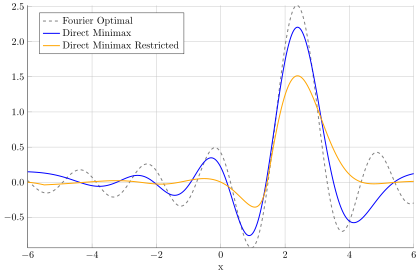

In [24]:
plot(marginal_grid, [cb_mean.Q.Q ma_mean.Q.Q .+ ma_mean.Q.Qo ma_mean_center.Q.Q .+ ma_mean_center.Q.Qo],
            xlabel="x", color=["grey" "blue" "orange"],legend=:topleft,
            line=([:dash :solid :solid]), 
             label=["Fourier Optimal" "Direct Minimax" "Direct Minimax Restricted"])

In [25]:
savefig("posterior_mean_minimax_kernel_bands.pdf")

In [42]:
cb_lfsr = ComteButucea(LFSRNumerator(2.0), m, marginal_grid)
ma_lfsr =  MinimaxCalibrator(ds, f_center, m, LFSRNumerator(2.0); C=Inf);
ma_lfsr_center =  MinimaxCalibrator(ds, f_center, m, LFSRNumerator(2.0); C=c_band);

Academic license - for non-commercial use only
Academic license - for non-commercial use only


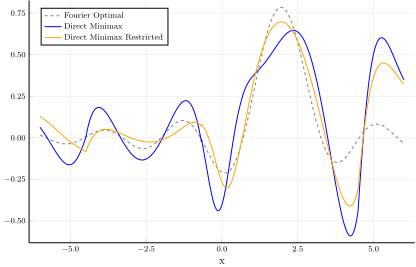

In [43]:
p0 = plot(marginal_grid, [cb_lfsr.Q.Q ma_lfsr.Q.Q .+ ma_lfsr.Q.Qo ma_lfsr_center.Q.Q .+ ma_lfsr_center.Q.Qo],
            xlabel="x", color=["grey" "blue" "orange"],legend=:topleft,
            line=([:dash :solid :solid]), 
             label=["Fourier Optimal" "Direct Minimax" "Direct Minimax Restricted"])

In [38]:
ma_lfsr.max_bias/ma_lfsr_center.max_bias, ma_lfsr.sd/ma_lfsr_center.sd

(4.106003750739279, 3.4132951644636877)

In [39]:
ma_lfsr.max_bias, ma_lfsr.sd

(0.006078963047079564, 0.005187498217808353)

In [40]:
g1_density_band = pdf(ds, ma_lfsr_center.π1, marginal_grid);
g2_density_band = pdf(ds, ma_lfsr_center.π2, marginal_grid);
g1_density_no_band = pdf(ds, ma_lfsr.π1, marginal_grid);
g2_density_no_band = pdf(ds, ma_lfsr.π2, marginal_grid);

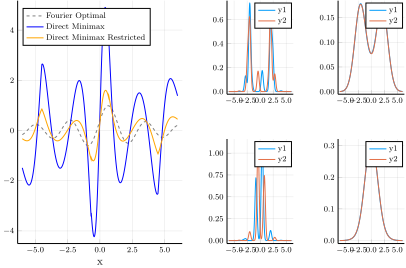

In [41]:
p1 = plot(marginal_grid, [g1_density_band g2_density_band])
p2 = plot(marginal_grid, [g1_density_no_band g2_density_no_band])

p3 = plot(marginal_grid, [ma_lfsr_center.f1 ma_lfsr_center.f2]/(marginal_grid[2]-marginal_grid[1]))
p4 = plot(marginal_grid, [ma_lfsr.f1 ma_lfsr.f2]/(marginal_grid[2]-marginal_grid[1]))
l = @layout [  a{0.5w} grid(2,2)]

plot(p0, p1, p3, p2, p4, layout=l)


In [29]:
savefig("lfsr_numerator_minimax.pdf")

In [26]:
struct OneSidedPriorTailProbability <: LinearInferenceTarget
    cutoff::Float64
end

function riesz_representer(target::OneSidedPriorTailProbability, t)
    one(Float64)*(t >= target.cutoff)
end


riesz_representer (generic function with 8 methods)

In [62]:
g1_density_band = pdf(ds, ma_prob.π1, marginal_grid);
g2_density_band = pdf(ds, ma_prob.π2, marginal_grid);
g1_density_no_band = pdf(ds, ma_prob_center.π1, marginal_grid);
g2_density_no_band = pdf(ds, ma_prob_center.π2, marginal_grid);

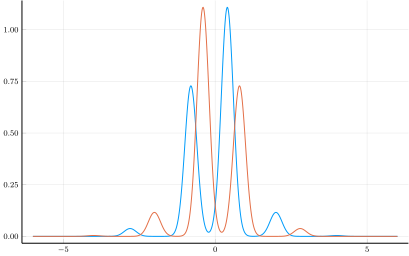

In [72]:
p1 = plot(marginal_grid, [g1_density_band g2_density_band], label="", xticks=([-5.0; 0.0; 5.0]))


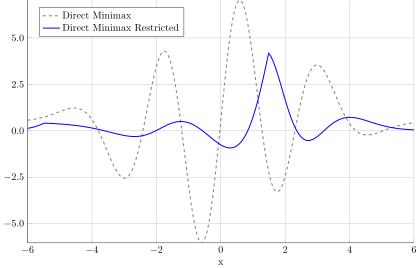

In [70]:
plot(marginal_grid, [ma_prob.Q.Q .+ ma_prob.Q.Qo ma_prob_center.Q.Q .+ ma_prob_center.Q.Qo],
            xlabel="x", color=["grey" "blue"],legend=:topleft,
            line=([:dash :solid ]), 
             label=["Direct Minimax" "Direct Minimax Restricted"])

In [72]:
ma_prob.max_bias, ma_prob_center.max_bias

(0.1277478034101267, 0.01350982443811204)

In [121]:
ma_lfsr_center =  MinimaxCalibrator(ds, f_center, m, LFSRNumerator(2.0); C=c_band);

Academic license - for non-commercial use only


In [122]:
ma_lfsr_noband =  MinimaxCalibrator(ds, f_center, m, LFSRNumerator(2.0); C=Inf);

Academic license - for non-commercial use only


In [124]:
pilot = posterior_stats(d_center, LFSRNumerator(2.0))

0.19559754543885402

In [125]:
ma_lfsr_calib =  MinimaxCalibrator(ds, f_center, m,
            CalibratedNumerator(LFSRNumerator(2.0), pilot);
            C=c_band);


Add `using LinearAlgebra` to your imports.
  likely near /Users/ignatiad/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ignatiad/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ignatiad/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ignatiad/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ignatiad/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ignatiad/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ignatiad/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ignatiad/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  lik

Academic license - for non-commercial use only


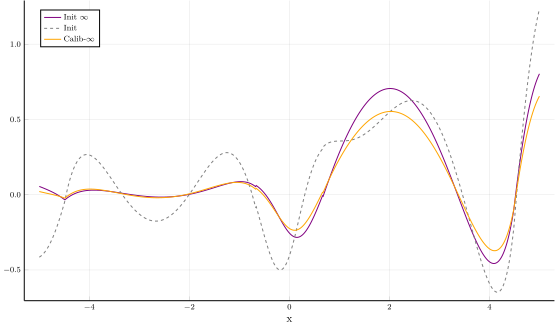

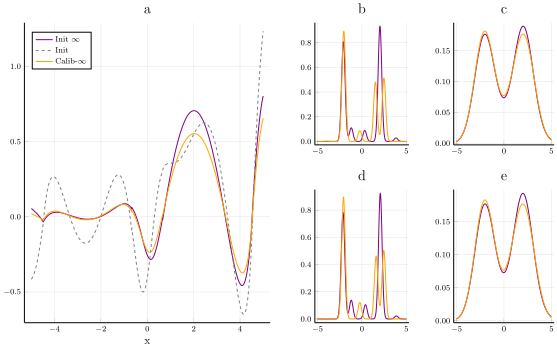

In [131]:
col1="purple"
col2="orange"

g1_density_band = pdf(ds, ma_lfsr_center.π1, marginal_grid);
g2_density_band = pdf(ds, ma_lfsr_center.π2, marginal_grid);
g1_density_no_band = pdf(ds, ma_lfsr_calib.π1, marginal_grid);
g2_density_no_band = pdf(ds, ma_lfsr_calib.π2, marginal_grid);

p0 = plot(marginal_grid, [ma_lfsr_center.Q.Q .+ ma_lfsr_center.Q.Qo ma_lfsr_noband.Q.Q .+ ma_lfsr_noband.Q.Qo ma_lfsr_calib.Q.Q .+ ma_lfsr_calib.Q.Qo],
            xlabel="x", color=["purple" "grey" "orange"],legend=:topleft,
            line=([:solid :dash :solid]), 
            label=[L"Init $\infty$" "Init" L"Calib-$\infty$"])

p1 = plot(marginal_grid, [g1_density_band g2_density_band], label="", 
      color=[col1 col2],
      xticks=([-5.0; 0.0; 5.0]))
p2 = plot(marginal_grid, [g1_density_no_band g2_density_no_band], label="", 
     color=[col1 col2],
     xticks=([-5.0; 0.0; 5.0]))


p4 = plot(marginal_grid, [ma_lfsr_center.f1 ma_lfsr_center.f2]/(marginal_grid[2]-marginal_grid[1]), 
    label="", xticks=([-5.0; 0.0; 5.0]),  color=[col1 col2])

p3 = plot(marginal_grid, [ma_lfsr_calib.f1 ma_lfsr_calib.f2]/(marginal_grid[2]-marginal_grid[1]), 
    label="", xticks=([-5.0; 0.0; 5.0]),  color=[col1 col2])

l = @layout [  a{0.5w} grid(2,2)]

plot(p0, p1, p3, p2, p4, layout=l, title = [('a':'z')[i] for j = 1:1, i=1:11])

## Thank you for your attention!